# Portfolio Analysis and Optimization
I will build two $10,000 investment portfolios containing four stocks. The first portfolio will have an equal weighting between the stocks. The second portfolio will be optimized with a weighting allocation that provides the best return, adjusted for risk. Please see the parameters for each of the portfolio's below:

1. Import one year of data for four stocks (Note: my company does not allow us to pull data directly from the web)
2. Build the initial portfolio with equal weighting to each of the stocks
3. Analyze and visualize the equal-weighted portfolio
4. Generate 10,000 portfolio scenarios with random weighting to each of the stocks
5. Identify the optimal portfolio from the scenarios and visualize the results

## Import Packages & Connect to Data

In [1]:
# Import packages needed for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# To view charts inside of Jupyter Notebook
%matplotlib inline 


In [2]:
# List the four stock ticker symbols for our portfolio
stock_list = ['AMD', 'AAPL', 'MSFT', 'ORCL']

# Create an empty dictionary to store our stock info
stocks = {}

# Loop through each stock in the stock_list
for i_stock in stock_list:
    stocks[i_stock] = pd.read_csv(str(i_stock + '.csv'), parse_dates=True, index_col = 'Date')
    
# Import 10-year Treasury Bond rates
rates = pd.read_csv('daily-treasury-rates-2023.csv')
rates

,Date,LT COMPOSITE (>10 Yrs),TREASURY 20-Yr CMT
0,12/29/2023,4.15,4.20
1,12/28/2023,4.09,4.14
2,12/27/2023,4.06,4.10
3,12/26/2023,4.17,4.20
4,12/22/2023,4.18,4.21
...,...,...,...
245,1/9/2023,3.78,3.83
246,1/6/2023,3.80,3.84
247,1/5/2023,3.92,3.96
248,1/4/2023,3.93,3.97


In [3]:
# Examine the 'AMD' Adj Close from the stocks dictionary to confirm results
stocks['AMD'].head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-02-21,77.150002,78.459999,76.449997,76.769997,76.769997,44045600
2023-02-22,76.930000,78.129997,75.919998,76.610001,76.610001,50286800
2023-02-23,80.629997,81.790001,77.970001,79.750000,79.750000,76391300
2023-02-24,77.750000,78.809998,76.940002,78.089996,78.089996,46700000
2023-02-27,79.639999,80.120003,78.529999,78.769997,78.769997,45617300


## Create the Equal-Weighted Portfolio
To create the equal-weighted portfolio, I will add some additional columns to the DataFrames in the `stocks` dictionary. The three columns that I will build are:

* Normalized Return = Adjusted Close / Adjusted Close on the `startdate` of the portfolio
* Allocation = Normalized Return * 0.25 (equal weighting for each of the four stocks)
* Position Value = Allocation * 10,000 (value of the portfolio)

In [4]:
# Create 'Normalized Return' column for each stock
for stock_name, stock_data in stocks.items():
    first_adj_close = stock_data.iloc[0]['Adj Close'] # Select the first row from the Adj Close column
    stock_data['Normalized Return'] = stock_data['Adj Close'] / first_adj_close

In [5]:
stocks['AAPL'].head()

,Open,High,Low,Close,Adj Close,Volume,Normalized Return
Date,,,,,,,
2023-02-21,150.199997,151.300003,148.410004,148.479996,147.691666,58867200,1.000000
2023-02-22,148.869995,149.949997,147.160004,148.910004,148.119400,51011300,1.002896
2023-02-23,150.089996,150.339996,147.240005,149.399994,148.606796,48394200,1.006196
2023-02-24,147.110001,147.190002,145.720001,146.710007,145.931076,55469600,0.988079
2023-02-27,147.710007,149.169998,147.449997,147.919998,147.134628,44998500,0.996228


In [6]:
# Create allocation for each stock - equally weighted in our initial portfolio
for stock_name, stock_data in stocks.items():
    stock_data['Allocation'] = stock_data['Normalized Return'] * 0.25

In [7]:
stocks['MSFT'].head()

,Open,High,Low,Close,Adj Close,Volume,Normalized Return,Allocation
Date,,,,,,,,
2023-02-21,254.479996,255.490005,251.589996,252.669998,250.613129,28397400,1.000000,0.250000
2023-02-22,254.089996,254.339996,250.339996,251.509995,249.462585,22491100,0.995409,0.248852
2023-02-23,255.559998,256.839996,250.479996,254.770004,252.696045,29219100,1.008311,0.252078
2023-02-24,249.960007,251.000000,248.100006,249.220001,247.191223,24990900,0.986346,0.246586
2023-02-27,252.460007,252.820007,249.389999,250.160004,248.123581,21190000,0.990066,0.247517


In [8]:
# Set the value of the portfolio to $10k. $2.5k per stock
for stock_name, stock_data in stocks.items():
    stock_data['Position Value'] = stock_data['Allocation'] * 10000

In [9]:
stocks['ORCL'].head()

,Open,High,Low,Close,Adj Close,Volume,Normalized Return,Allocation,Position Value
Date,,,,,,,,,
2023-02-21,86.760002,86.940002,86.150002,86.199997,84.899490,5260300,1.000000,0.250000,2500.000000
2023-02-22,86.680000,87.180000,85.980003,86.320000,85.017685,5840100,1.001392,0.250348,2503.480439
2023-02-23,87.150002,89.480003,87.059998,88.580002,87.243591,8637100,1.027610,0.256903,2569.025768
2023-02-24,87.309998,88.889999,87.139999,88.660004,87.322380,7659200,1.028538,0.257135,2571.345835
2023-02-27,88.860001,88.970001,87.360001,87.959999,86.632942,6748800,1.020418,0.255104,2551.044241


## Visualize the Portfolio Performance
To visualize the portfolio performance, I'll create two line charts that show the return of the portfolio, and the return of the individual stocks over time. I'll create a new DataFrame that contains the `position value` for each stock, and the total portfolio value. The DataFrame will be used to create the two visuals.

In [10]:
# Create position_values dictionary
position_values = {}

for stock_name, stock_data in stocks.items():
    position_values[stock_name] = stock_data['Position Value']

In [11]:
# Convert the position_values dictionary to a DataFrame
position_values = pd.DataFrame(data=position_values)

position_values.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2023-02-21,2500.000000,2500.000000,2500.000000,2500.000000
2023-02-22,2494.789761,2507.240321,2488.522708,2503.480439
2023-02-23,2597.043217,2515.490549,2520.778201,2569.025768
2023-02-24,2542.985510,2470.198217,2465.864657,2571.345835
2023-02-27,2565.129610,2490.570930,2475.165427,2551.044241


In [12]:
# Add 'Total' column to position values, summing the other columns
position_values['Total'] = position_values.sum(axis=1)

In [13]:
position_values.head()

,AMD,AAPL,MSFT,ORCL,Total
Date,,,,,
2023-02-21,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000
2023-02-22,2494.789761,2507.240321,2488.522708,2503.480439,9994.033229
2023-02-23,2597.043217,2515.490549,2520.778201,2569.025768,10202.337735
2023-02-24,2542.985510,2470.198217,2465.864657,2571.345835,10050.394220
2023-02-27,2565.129610,2490.570930,2475.165427,2551.044241,10081.910209


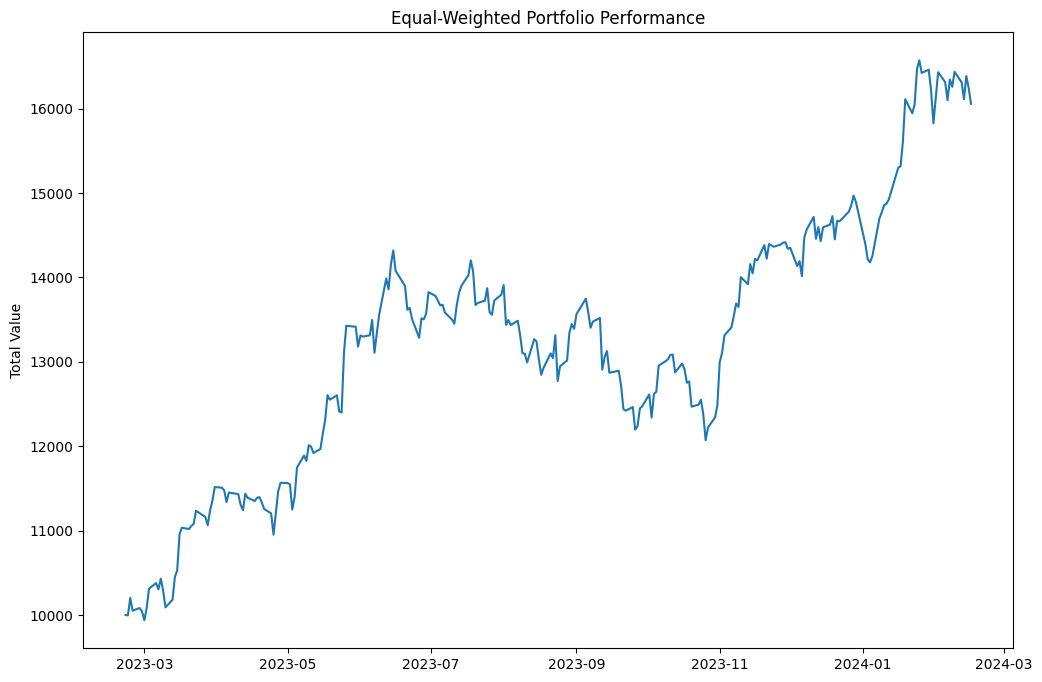

In [14]:
# View the total portfolio
plt.figure(figsize=(12, 8))

plt.plot(position_values['Total'])

plt.title('Equal-Weighted Portfolio Performance')
plt.ylabel('Total Value');

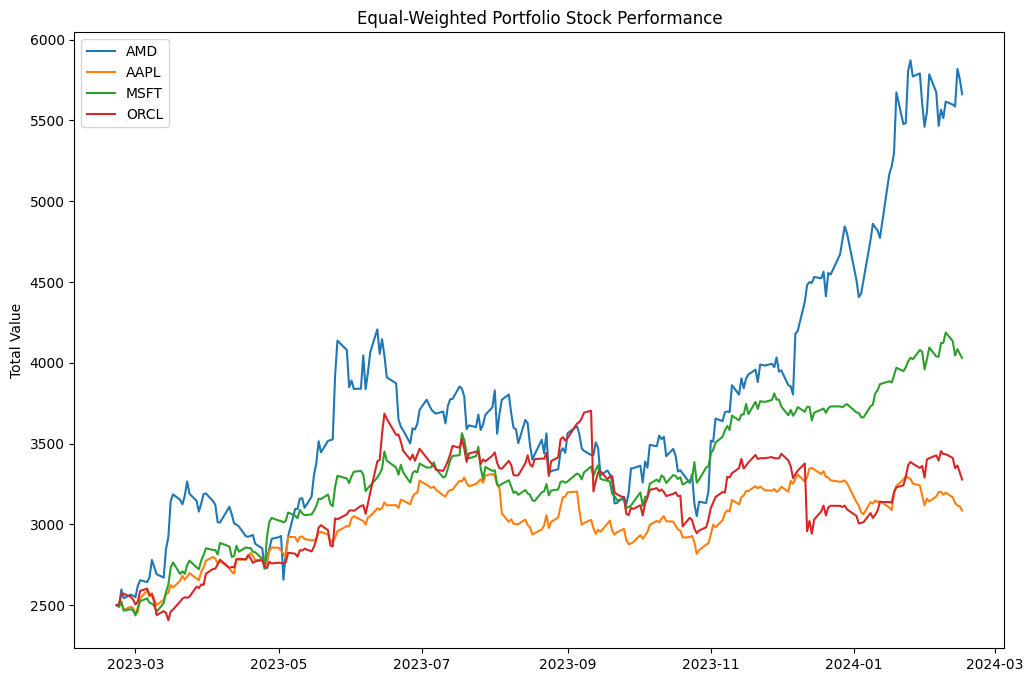

In [15]:
# View the four stocks in the portfolio
plt.figure(figsize=(12, 8)) # Adjusted chart size

plt.plot(position_values.iloc[:,0:4])

plt.title('Equal-Weighted Portfolio Stock Performance')
plt.ylabel('Total Value')
plt.legend(['AMD', 'AAPL', 'MSFT', 'ORCL']);

## Calculate Performance Metrics for the Portfolio
Now that I have created and visualized the equal-weighted portfolio, I will calculate a few metrics to measure the performance of the portfolio. Here are the five performance metrics:

 * Cumulative Return
 * Mean Daily Return
 * Standard Deviation Daily Return
 * Sharpe Ratio
 * Annualized Sharpe Ratio

In [16]:
# Define the end and start value of the portfolio
end_value = position_values['Total'][-1]
start_value = position_values['Total'][0]

# Calculate the cumulative portfolio return as a percentage
cumulative_return = end_value / start_value - 1

print(str(round(cumulative_return*100,2)), '%')

60.56 %


In [38]:
# Create a 'Daily Returns' column
position_values['Daily Return'] = position_values['Total'].pct_change()
position_values = position_values.fillna(0) # to remove NaN from initial Daily Return row with no value

position_values.head()

,AMD,AAPL,MSFT,ORCL,Total,Daily Return
Date,,,,,,
2023-02-21,2500.000000,2500.000000,2500.000000,2500.000000,10000.000000,0.000000
2023-02-22,2494.789761,2507.240321,2488.522708,2503.480439,9994.033229,-0.000597
2023-02-23,2597.043217,2515.490549,2520.778201,2569.025768,10202.337735,0.020843
2023-02-24,2542.985510,2470.198217,2465.864657,2571.345835,10050.394220,-0.014893
2023-02-27,2565.129610,2490.570930,2475.165427,2551.044241,10081.910209,0.003136


In [18]:
# Calculate the mean Daily Return 
mean_daily_return = position_values['Daily Return'].mean()

print('The mean daily return is:', str(round(mean_daily_return, 4)))

The mean daily return is: 0.002


In [19]:
# Calculate the standard deviation of Daily Return 
std_daily_return = position_values['Daily Return'].std()

print('The std daily return is:', str(round(std_daily_return, 4)))

The std daily return is: 0.0146


In [20]:
# Calculate the Average Risk Free Rate Daily
rates_10_year_daily = rates['LT COMPOSITE (>10 Yrs)'].mean() / 100
rates_mean_daily = rates_10_year_daily / position_values['Daily Return'].count()

print('The RfR daily is:', str(round(rates_mean_daily, 4)))

The RfR daily is: 0.0002


### Sharpe Ratio
I'll use the sharpe ratio to quantify how much return we are getting for a given level of risk. The goal is to find the investment that will have higher returns than the benchmark or have the same return with less risk than the benchmark. 

It is calculated by the average return of the portfolio minus the risk free rate (I will use the 10-year Treasury Bond assuming a 10 year holding period for the portfolio), divided by the standard deviation of the return. 

In [21]:
# Calculate the sharpe ratio
sharpe_ratio = (mean_daily_return - rates_mean_daily ) / std_daily_return


In [22]:
# Calculate the annualized sharpe ratio
sharpe_ratio_annualized = sharpe_ratio * 252**0.5 # assuming 252 trading days in a year

sharpe_ratio_annualized

2.00485282226788

## Prepare Scenarios to Optimize Portfolio Weighting
Let's prepare the data ahead of generating the scenarios to optimize the portfolio weighting.

 * Create a dictionary containing the adjusted close for each of our stocks: stock_adj_close
 * Create another dictionary that transforms the adjusted close for each day to a percentage change from the previous day

In [23]:
# Create stock_adj_close dictionary
stock_adj_close = {}

for stock_name, stock_data in stocks.items():
    stock_adj_close[stock_name] = stock_data['Adj Close']

In [24]:
# Convert the stock_adj_close dictionary to a DataFrame
stock_adj_close = pd.DataFrame(data=stock_adj_close)

stock_adj_close.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2023-02-21,76.769997,147.691666,250.613129,84.899490
2023-02-22,76.610001,148.119400,249.462585,85.017685
2023-02-23,79.750000,148.606796,252.696045,87.243591
2023-02-24,78.089996,145.931076,247.191223,87.322380
2023-02-27,78.769997,147.134628,248.123581,86.632942


In [37]:
# Create stock_returns DataFrames to see the day over day change in stock value
stock_returns = stock_adj_close.pct_change()
stock_returns = stock_returns.fillna(0) # To remove NaN in the first columna where there is no data

stock_returns.head()

,AMD,AAPL,MSFT,ORCL
Date,,,,
2023-02-21,0.000000,0.000000,0.000000,0.000000
2023-02-22,-0.002084,0.002896,-0.004591,0.001392
2023-02-23,0.040987,0.003291,0.012962,0.026182
2023-02-24,-0.020815,-0.018005,-0.021784,0.000903
2023-02-27,0.008708,0.008247,0.003772,-0.007895


## Build & Run 10,000 Portfolio Scenarios
Now that the data is prepared, I will create and run the scenarios. First, I'll build the structures required to generate these scenarios and store the output. To do this, I will use the `numpy.zeros()` function. 

This function creates arrays that are filled with zeros. After running the scenarios, replace these zeros with the corresponding output. The arrays are created with zeros first to give our arrays the correct shape before replacing them with the correct values.

Four different arrays to create:

 * weights_array - this array will have 10,000 rows and 4 columns and hold the weighting allocation for each stock
 * returns_array - this array will contain the portfolio return for each scenario
 * volatility_array - this array will contain the portfolio volatility for each scenario
 * sharpe_array - this array will contain the sharpe ratio for each scenario

In [26]:
# Define the number of scenarios and create a blank array to populate stock weightings for each scenario
scenarios = 10000

weights_array = np.zeros((scenarios, len(stock_returns.columns)))

weights_array

array([[0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 0., 0.]])

In [27]:
# Create additional blank arrays for scenario output
returns_array = np.zeros(scenarios)
volatility_array = np.zeros(scenarios)
sharpe_array = np.zeros(scenarios)

In [28]:
import random
random.seed(3)
np.random.seed(3)

for index in range(scenarios): 
    # Generate four random numbers for each index
    numbers = np.array(np.random.random(4))
    
    # Divide each number by the sum of the numbers to generate the random weight
    weights = numbers / np.sum(numbers)
    
    # Save the weights in weights_array
    weights_array[index,:] = weights
    
    # Calculate the return for each scenario
    returns_array[index] = np.sum(stock_returns.mean()*252*weights)
    
    # Calculate the expected volatility for each scenario
    volatility_array[index] = np.sqrt(np.dot(weights.T,np.dot(stock_returns.cov()*252, weights)))

    # Calculate the Sharpe Ratio for each scenario 
    sharpe_array[index] = returns_array[index] / volatility_array[index]

In [29]:
print("The first combination:", weights_array[0])

The first combination: [0.26728964 0.34364796 0.14116943 0.24789297]


In [30]:
print("The sharpe ratio of the first portfolio:", sharpe_array[0])

The sharpe ratio of the first portfolio: 2.154210886561712


## Identify the Optimal Portfolio
Now that we have the output for all 10,000 scenarios, we can identify the optimal portfolio. The optimal portfolio in this case study is the portfolio that has the highest sharpe ratio.

In [31]:
# Find the highest sharpe ratio in sharpe_array
sharpe_array.max()

2.4661149385046772

In [32]:
# Find the index of the optimal portfolio
index_max_sharpe = sharpe_array.argmax()
index_max_sharpe

3204

In [33]:
# Print the optimal weights for each stock
print(stock_list)
print(weights_array[index_max_sharpe,:])

['AMD', 'AAPL', 'MSFT', 'ORCL']
[0.22743763 0.01031096 0.75111179 0.01113962]


## Visualize the Optimal Portfolio & Portfolio Scenarios
Let's visualize the portfolio scenarios by using a scatter chart. I will use the volatility and returns arrays on each axis to see the relationship between risk and reward. As a final step, let's visualize where the optimal portfolio appears among all of the scenarios.

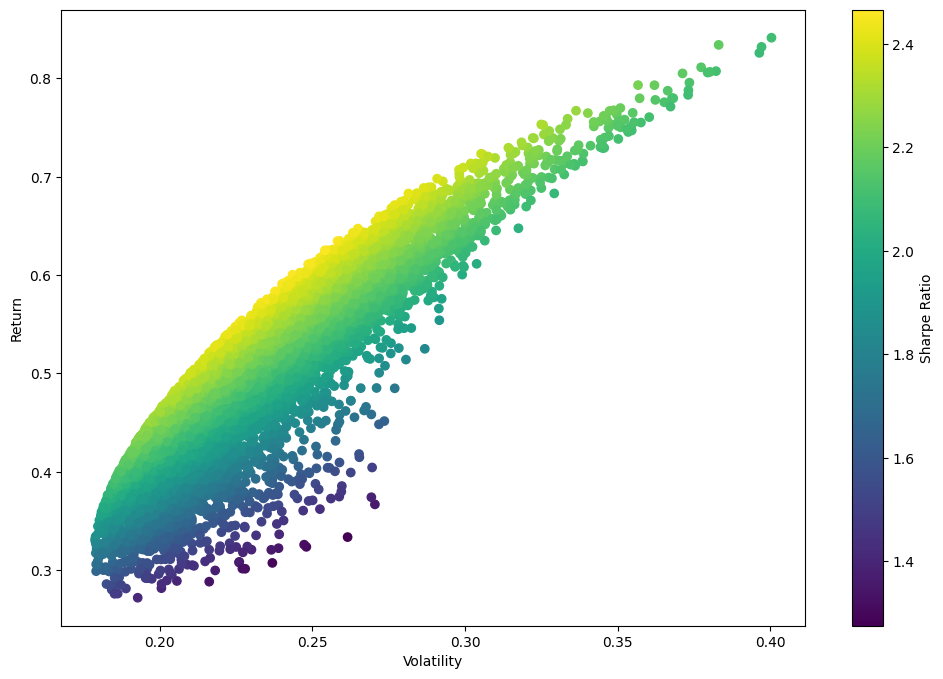

In [34]:
# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return');

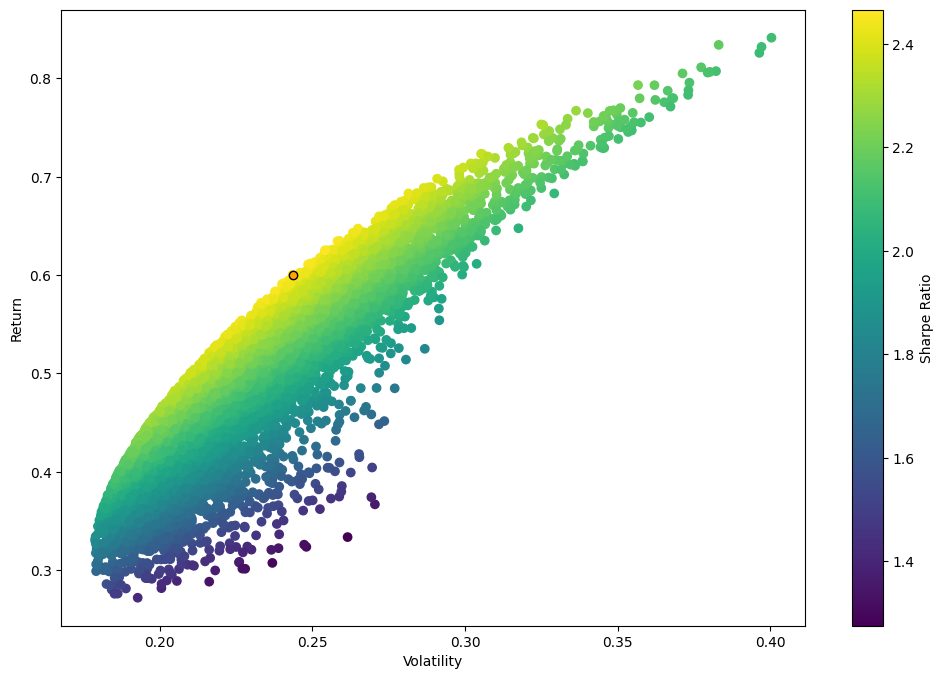

In [35]:
# Identify the optimal portfolio in the returns and volatility arrays
max_sharpe_return = returns_array[index_max_sharpe]
max_sharpe_volatility = volatility_array[index_max_sharpe]

# Visualize volatility vs returns for each scenario
plt.figure(figsize=(12,8))

plt.scatter(volatility_array, returns_array, c=sharpe_array, cmap='viridis')

plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Volatility')
plt.ylabel('Return')

# Add the optimal portfolio to the visual
plt.scatter(max_sharpe_volatility, max_sharpe_return, c='orange', edgecolors='black');